Fem un Rdkit amb la molècula ML210 ja que s'ha vist que és un inhibidor per la proteina GPX-4. 

https://www.selleckchem.com/products/ml210.html
https://www.tocris.com/products/ml-210_6429

smiles:
https://www.ebi.ac.uk/chembl/compound_report_card/CHEMBL1951048/


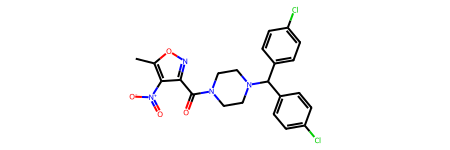

In [20]:
smiles_ml210 = "Cc1onc(C(=O)N2CCN(C(c3ccc(Cl)cc3)c3ccc(Cl)cc3)CC2)c1[N+](=O)[O-]"

from rdkit import Chem
molecule=Chem.MolFromSmiles(smiles_ml210)

molecule


In [32]:
mol = Chem.MolFromSmiles("Cc1onc(C(=O)N2CCN(C(c3ccc(Cl)cc3)c3ccc(Cl)cc3)CC2)c1[N+](=O)[O-]")
d = rdMolDraw2D.MolDraw2DCairo(250, 200) # or MolDraw2DSVG to get SVGs
mol.GetAtomWithIdx(2).SetProp('atomNote', 'foo')
mol.GetBondWithIdx(0).SetProp('bondNote', 'bar')
d.drawOptions().addStereoAnnotation = True
d.drawOptions().addAtomIndices = True
d.DrawMolecule(mol)
d.FinishDrawing()
d.WriteDrawingText('atom_annotation_1.png') 



In [64]:
#Read a database sdf file

from rdkit import Chem
from rdkit.Chem import Crippen
import pandas as pd

database = Chem.SDMolSupplier('./data/Download_SDF_Covalent_Cysteine_Library_39301.sdf')


In [74]:
#Create a dataframe

data = [ ]

for mol in database:
    #Extract properties using RDKit functions
    mol_name = mol.GetProp("Name")
    smiles = Chem.MolToSmiles(mol)
    formula = Chem.rdMolDescriptors.CalcMolFormula(mol)
    mw= Chem.rdMolDescriptors.CalcExactMolWt(mol)
    logp= Crippen.MolLogP(mol)
    num_hbd = Chem.rdMolDescriptors.CalcNumHBD(mol)
    num_hba = Chem.rdMolDescriptors.CalcNumHBA(mol)

    #Append results in a data list
    data.append([smiles,mol_name,formula,mw,logp,num_hbd,num_hba])

#We have a list with information. We Create a Dataframe:
df= pd.DataFrame(data,columns=['SMILES','Name','Formula','MW','logP',"H-bond donor","H-bond acceptor"])

In [75]:
#Print information about database
print(df.head(10))


                                                Name  \
0                    2-(2-phenyl-1-ethynyl)thiophene   
1   2,4,6-triphenyl-1,3-diazabicyclo[3.1.0]hex-3-ene   
2  4,4-diphenyl-2-[5-(2-phenylethynyl)furan-2-yl]...   
3               3-(2-phenylethynyl)-1-benzothiophene   
4  2,3-bis(3-{2-[4-(phenylsulfanyl)phenyl]-1-ethy...   
5  2,3-bis{3-[2-(4-phenoxyphenyl)-1-ethynyl]pheny...   
6                           (2-phenylethynyl)benzene   
7   4,6-bis(2-phenyl-1-ethynyl)-2,1,3-benzoxadiazole   
8        3-(2-phenyl-1-ethynyl)dibenzo[b,d]thiophene   
9       3-phenyl-5-(2-phenylethynyl)-2,1-benzoxazole   

                                              SMILES     Formula          MW  \
0                               C(#Cc1cccs1)c1ccccc1      C12H8S  184.034671   
1            c1ccc(C2=NC(c3ccccc3)N3C2C3c2ccccc2)cc1    C22H18N2  310.146999   
2  C(#Cc1ccc(C2Nc3ccccc3C(c3ccccc3)(c3ccccc3)O2)o...   C32H23NO2  453.172879   
3                         C(#Cc1csc2ccccc12)c1ccccc1     C16H10